In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [11]:

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [12]:

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.9299 - loss: 0.2059 - val_accuracy: 0.6186 - val_loss: 1.9287
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9457 - loss: 0.1656 - val_accuracy: 0.6085 - val_loss: 2.0184
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9466 - loss: 0.1607 - val_accuracy: 0.6103 - val_loss: 2.0954
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9590 - loss: 0.1326 - val_accuracy: 0.6087 - val_loss: 2.2077
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9586 - loss: 0.1304 - val_accuracy: 0.6017 - val_loss: 2.3472
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9639 - loss: 0.1123 - val_accuracy: 0.6188 - val_loss: 2.3424
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9683 - loss: 0.1010 - val_accuracy: 0.6089 - val_loss: 2.5903
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.9704 -

In [23]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5881 - loss: 2.8595
Test Accuracy: 0.5865


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


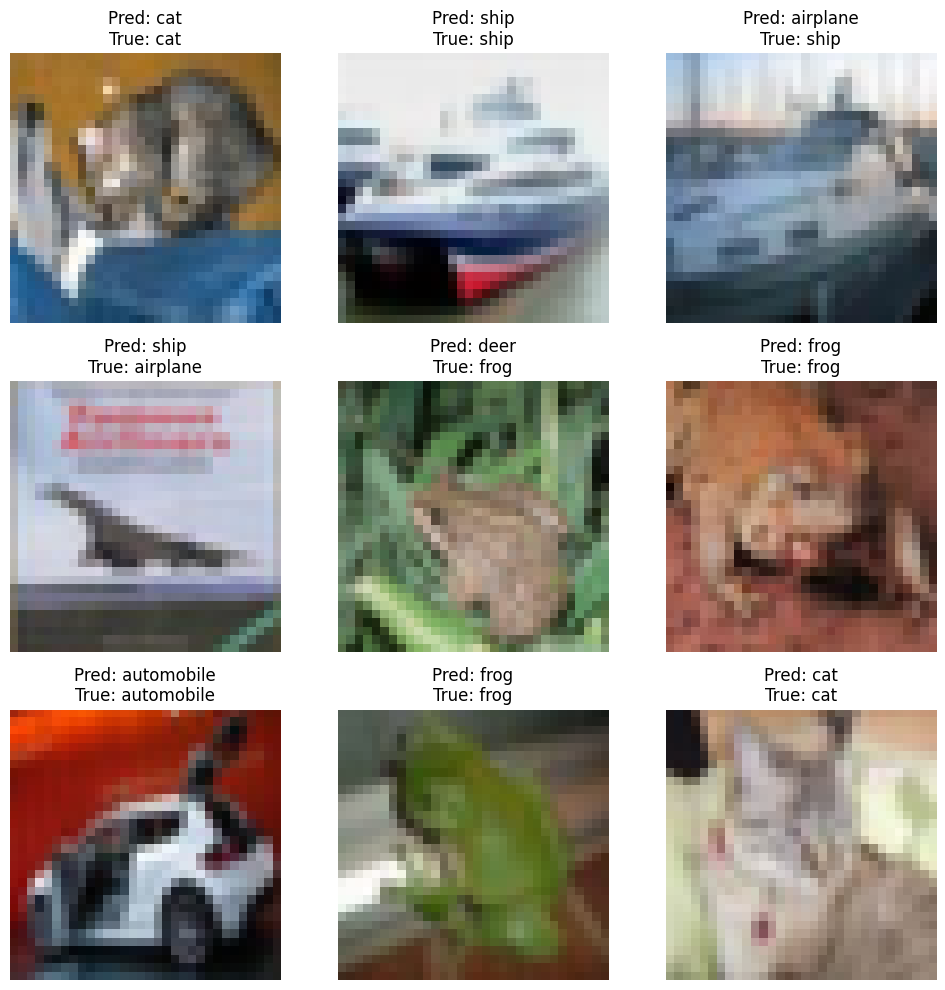

In [24]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    pred = model.predict(X_test[i:i+1])
    pred_class = class_names[np.argmax(pred)]
    true_class = class_names[np.argmax(y_test[i])]
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}")
    plt.axis('off')
plt.tight_layout()
plt.show()